# Building movie recommendation systems

Recommendation systems are some of the most visible applications of Data Science. Their algorithms learn about past preferences and recommend items that the user is most likely to purchase or use. 

Almost every major tech company has applied them in some form. Facebook uses it to recommend people to follow and pages to like, YouTube to decide which video to play next on autoplay and Amazon uses it to suggest products to customers. In 2009, Netflix even offered a prize of a million dollars to anyone who could improve its recommendation system by 10%.

There are 3 basic types of recommendation systems:

* Simple recommendation systems: recommend the top items to all customers based on a certain metric or score.

* Content-based recommendation systems: suggest similar items based on a past purchase. The idea behind it is that if a person likes a particular item, they will also like an item that is similar to it. 

* Collaborative filtering engines: predict the rating that a user would give an item based on past ratings and preferences of other similar users.

In this project, we will build 3 recommendation systems (one of each type) and discuss their uses and limitations.

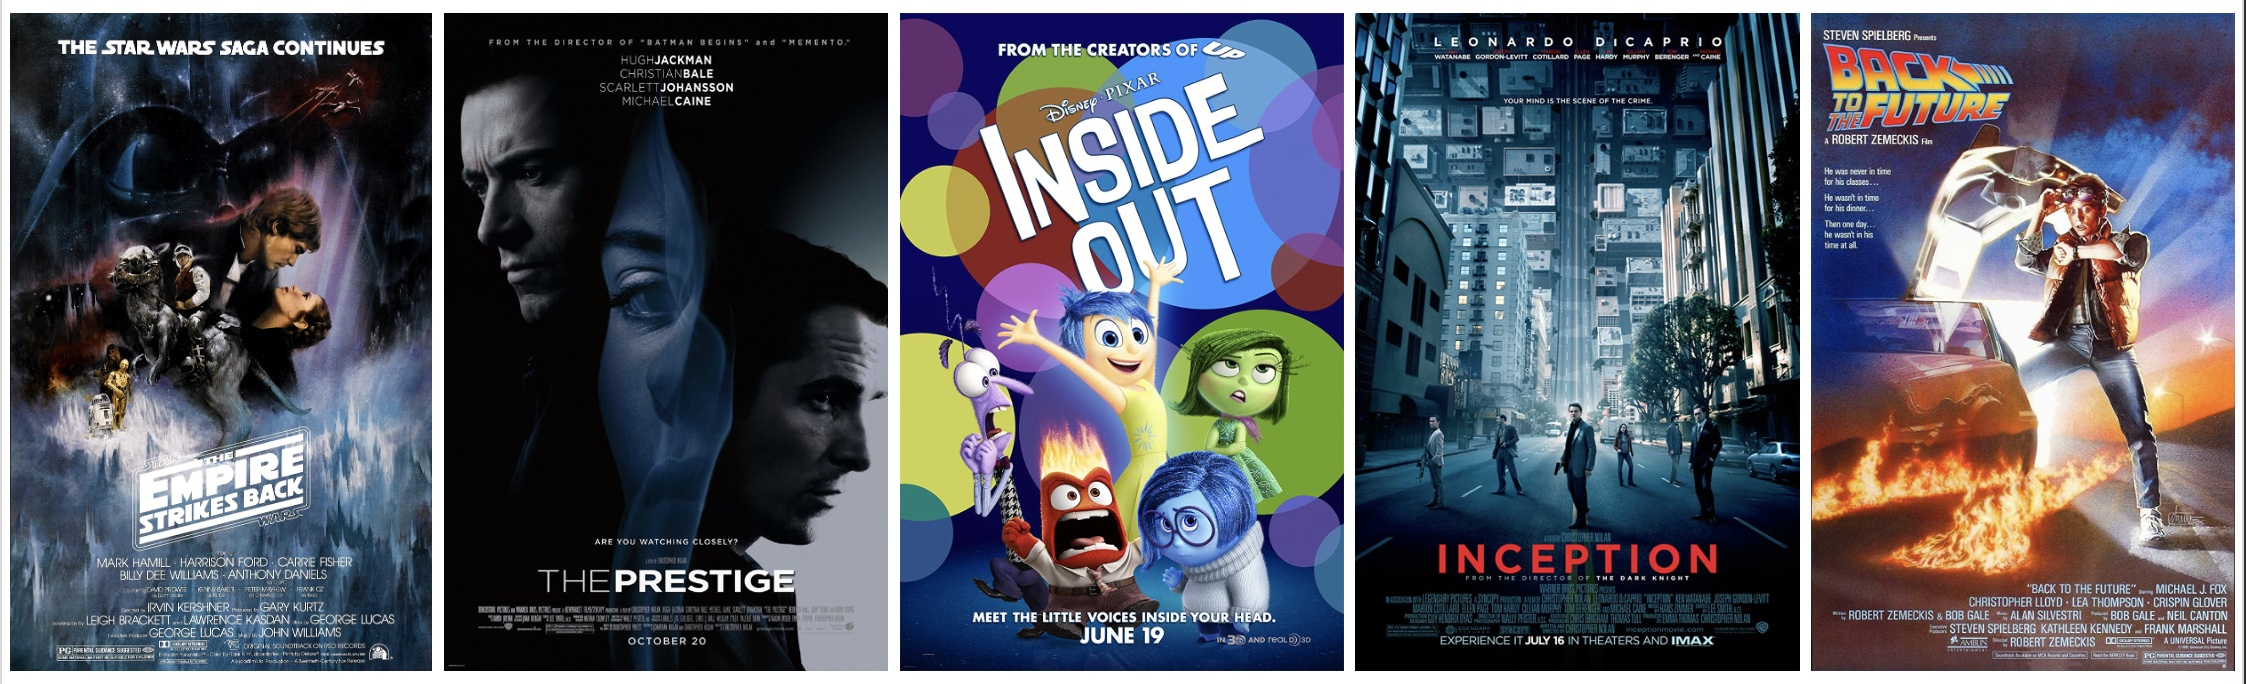

## The dataset 

For this project we are going to use metadata from 45,000 movies, which represents a subset of the [Full MovieLens Dataset.](https://grouplens.org/datasets/movielens/latest/) 

The files used on this project can be found on [Kaggle.](https://www.kaggle.com/rounakbanik/the-movies-dataset/data)

The dataset includes information on cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, vote counts and vote averages.

In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
# load the dataset
movies = pd.read_csv("movies_metadata.csv", low_memory = False)
movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [3]:
# get the general information about the dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
# check for total NaN values in each of the columns
movies.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

## 1. Simple recommendation system

For a non-personalized movie recommendation system, we are only going to suggest highly rated movies to the users.

To do this we need to use a weighted rating that takes into account the average rating and the number of votes it has accumulated, so that a movie with a high rating and thousands of voters gets a higher score than a movie with the same rating but just a few voters.

From IMDB we can see that the weighted rating formula is as follows:

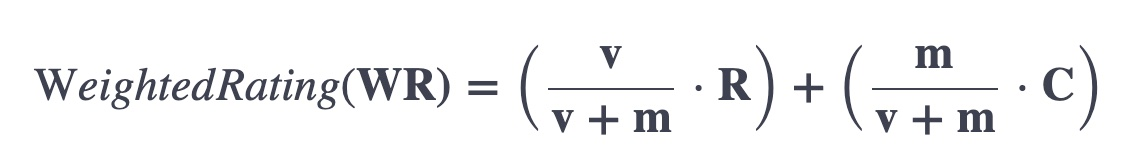

Where:

v is the number of votes for the movie;

m is the minimum votes required to be listed in the chart;

R is the average rating of the movie;

C is the mean vote across the whole report.

In our dataset we have the values of v (vote_count) and R (vote_average) for each movie in the dataset. We can also calculate C from this data.

However, looking at the information about each column in our dataset, we can notice that there are a few null values in both vote_count and vote_average. 6 null values are probably not going to impact the results from 45,000 movies, but as good practice, we will remove them.

In [5]:
# make a copy of the dataset
simple = movies.copy()

In [6]:
# drop NaN values
simple.dropna(subset=['vote_count', 'vote_average'], inplace = True)

# check for NaN values on all columns
simple.isna().sum()

adult                        0
belongs_to_collection    40970
budget                       0
genres                       0
homepage                 37682
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   0
poster_path                383
production_companies         0
production_countries         0
release_date                84
revenue                      0
runtime                    257
spoken_languages             0
status                      81
tagline                  25048
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64

Now, let's calculate the mean vote across the whole report (C):

In [7]:
# calculate mean of vote average column
C = simple['vote_average'].mean()
print(C)

5.618207215133889


This tell us that the average movie rating is 5.6

As for m, this is a hyperparameter that serves as a filter and will remove movies that have a number of votes less than the threshold we set. 

In this project we will want our system to recommend the movies on the top 10% in terms of the number of votes.

In [8]:
# to calculate m
m = simple['vote_count'].quantile(0.90)
print(m)

160.0


After calculating m, we can create a filter to select only the movies that had at least 160 votes.

In [9]:
# filter only movies that had at least 160 votes
highly_voted_movies = simple.copy().loc[simple['vote_count'] >= m]
highly_voted_movies.shape

(4555, 24)

Now, we will calculate the weighted rating for each one of the 4555 movies that have been filtered.

In [10]:
# create a function that calculates the weighted rating
def weighted_rating(i, m = m, C = C):
    
    ''' Fuction that takes in the vote_count and vote_average to calculate 
    the weighted rating based on the IMDB formula'''
    
    v = i['vote_count']
    R = i['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

With the function defined, we can use it to calculate the weighted rating for each movie. For this, we will create a new column called 'weighted rating' on the highly_voted_movies dataframe.

In [11]:
# create a new column called 'weighted score' and append it with values calculated using the function above
highly_voted_movies['weighted score'] = highly_voted_movies.apply(weighted_rating, axis=1)
highly_voted_movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,weighted score
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,7.640253
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,6.820293
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,5.660700


We can now sort the movies by their weighted scores and print the top 5 movies based on this metric

In [12]:
# sort movies from higher to lower weighted ratings 
highly_voted_movies = highly_voted_movies.sort_values('weighted score', ascending=False)

# show the top 5 movies based on the weighted rating
highly_voted_movies[['title', 'weighted score']].head(5)

,title,weighted score
314,The Shawshank Redemption,8.445869
834,The Godfather,8.425439
10309,Dilwale Dulhania Le Jayenge,8.421453
12481,The Dark Knight,8.265477
2843,Fight Club,8.256385


### Conclusion:

From the output above we can see that our simple recommendation system puts 'The Shawshank Redemption', 'The Godfather', 'Dilwale Dulhania Le Jayenge', 'The Dark Knight' and 'Fight Club' as the top 5 movies based on our weighted rating metric; and our system would recommend them to all our customers. That also highlights a limitation of using our simple recommendation system, which is that it is not personalized and will give the same 5 movie recommendation for all users that try to use it.

## 2. Content-based recommendation system

This type of recommendation system is used to recommend items that are similar to the ones a user has previously purchased. In here, we are going to build a system that recommends movies that are similar to a particular movie in regards to their plot summary.

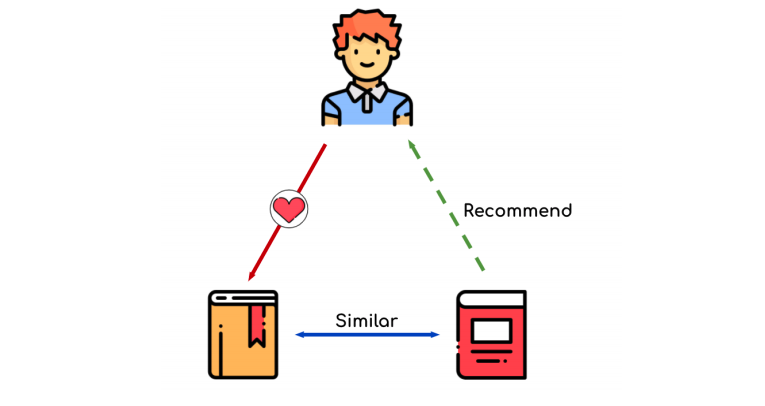

*Image taken from DataCamp's course "Building Recommendation Engines in Python"*

Now, since we are comparing plot summaries to recommend movies that have similar plots, we have a Natural Language Processing (NLP) problem at hand. In order to be able to calculate the similarity between plots, we first need to vectorize the text data.

We will compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview, and this will give us a matrix where each column represents a word and each column represents a movie.

In [13]:
# make a copy of our origial dataset
content = movies.copy()

In [14]:
# import TfidfVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# remove all english stop words
tfidf = TfidfVectorizer(stop_words='english')

# replace NaN with an empty string
content['overview'] = content['overview'].fillna('')

# build the matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(content['overview'])

tfidf_matrix.shape

(45466, 75827)

Now, to calculate the similarity between two movies, we will be using the cosine similarity. 

In [15]:
# import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

cosine_sim.shape

(45466, 45466)

Our output is a matrix that has a cosine similarity score for each movie with every other movie. 

Before we continue to defining a function that returns our recommended movies, we first need a mechanism that identifies the index of a movie in our dataframe, given its title.

In [16]:
# construct a reverse map of indices and movie titles
indices = pd.Series(content.index, index=content['title']).drop_duplicates()

Now, let's define a function that takes in a movie title as an input and outputs a list of the 3 most similar movies. 

In [17]:
def recommendations(title, cosine_sim=cosine_sim):
    '''Function that takes in movie title as input 
    and outputs most similar movies'''
    
    # to get the index of the movie that matches the title
    idx = indices[title]

    # to get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # to sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # to get the scores of the 3 most similar movies
    sim_scores = sim_scores[1:4]

    # to get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # to return the top 3 most similar movies
    return content['title'].iloc[movie_indices]

In [18]:
recommendations('Inception')

44314              III
2039             House
25299    Borrowed Time
Name: title, dtype: object

In [19]:
recommendations('The Prestige')

21300    Make Believe
38805      Fast Girls
40114        Imperium
Name: title, dtype: object

In [20]:
recommendations('Star Wars')

1154           The Empire Strikes Back
30434    The Star Wars Holiday Special
26555     Star Wars: The Force Awakens
Name: title, dtype: object

### Conclusion:
We can see that our recommendation system works and returns similar movies. One limitation that the model has is that it only takes into account the plot summary. We could circumvent this and build a more complex model by adding other features such as director, cast and keywords. However, our content based system is only capable of suggesting movies that are similar to a particular movie, but it is not capable of capturing tastes and biases of a user. Meaning that anyone querying our system for a movie recommendations will receive the same recommendations than any other user.

## 3. Collaborative filtering engine

As for collaborative filtering engines, they are based on the similarity in preferences and choices between users. It analyses how similar the tastes of one user is to another and makes recommendations on the basis of that.

There are 2 main types of collaborative filtering algorithms: User-User Collaborative Filtering and Item-Item Collaborative Filtering.

1. User-based Collaborative Filtering: it finds other users that have similar past preference patterns to the user we are working with; and recommends items liked by those past users which our user has not yet encountered.
2. Item-based Collaborative Filtering: it is quite similar to the previous algorithm, but instead of finding user’s look-alike, it finds items’ look-alike. It then easily recommends alike items to user who have rated any other item.

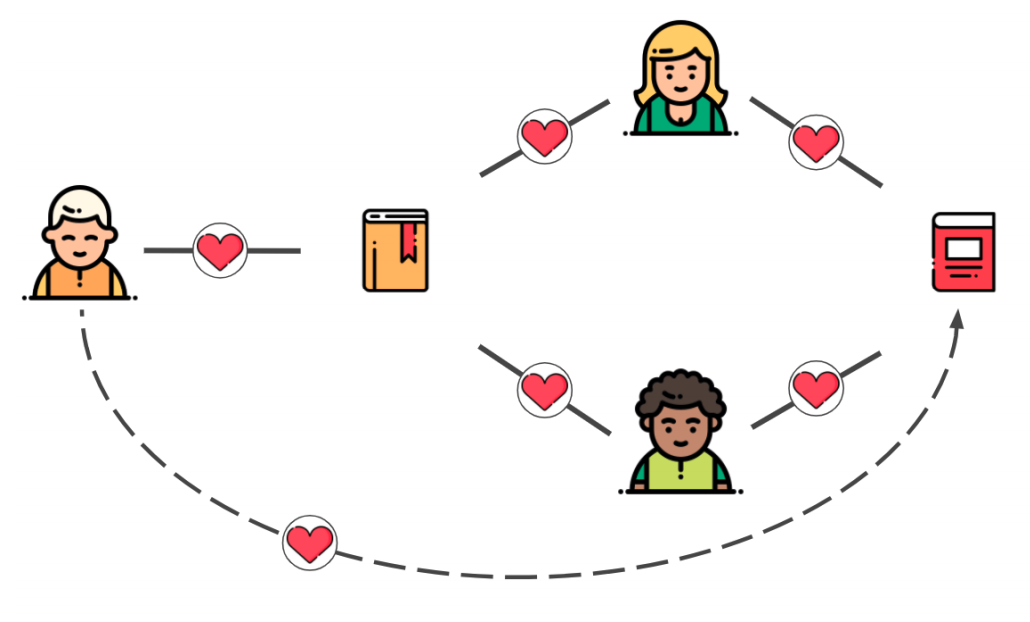

*Image taken from DataCamp's course "Building Recommendation Engines in Python"*

For this type of engine we are going to need the dataset that contains movie ratings and user IDs.

In [21]:
# import dataset 
df = pd.read_csv('ratings.csv')
df.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [22]:
# get the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [23]:
# rename the column movieId to id 
df.rename(columns={'movieId': 'id'}, inplace = True)
df.head(5)

,userId,id,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Since we want our recommendation system to ouput the title of movies instead of ID numbers, let's create a new column with the titles by merging the original movies dataset on movie ID.

In [24]:
# get a dataframe with only the movies ids and titles
movies_ids = movies[['id', 'original_title']]
movies_ids.head(5)

,id,original_title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II


In [25]:
# get the general information about movies_ids
movies_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              45466 non-null  object
 1   original_title  45466 non-null  object
dtypes: object(2)
memory usage: 710.5+ KB


In [26]:
# change values on column 'id' to numeric values so we can merge the dataframes
df['id'] = df['id'].apply(pd.to_numeric, errors='coerce')
movies_ids['id'] = movies_ids['id'].apply(pd.to_numeric, errors='coerce')

<ipython-input-26-c2f2d91a367e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ids['id'] = movies_ids['id'].apply(pd.to_numeric, errors='coerce')


In [27]:
# to merge the two datasets on movie IDs
collaborative = pd.merge(df, movies_ids, on='id')
collaborative.tail(5)

,userId,id,rating,timestamp,original_title
42175,610,80094,4.0,1493848484,Hra o jablko
42176,610,89072,4.0,1493848545,Ginger
42177,610,93193,3.0,1493850013,Jigsaw
42178,610,114044,3.5,1493848721,Interkosmos
42179,610,163937,3.5,1493848789,Film About a Woman Who…


Now, let's pivot our original table and set userId as our index and the movies' titles as our columns. This will result in a table that has the users IDs as the first column and subsequent columns as the movies IDs.

In [28]:
# pivot table and set userId as our index
user_matrix = collaborative.pivot_table(index='userId', columns='original_title', values='rating')
user_matrix.head()

original_title,!Women Art Revolution,$5 a Day,'R Xmas,'Twas the Night Before Christmas,...Più forte ragazzi!,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,...,봄 여름 가을 겨울 그리고 봄,빈집,사마리아,오직 그대만,올드보이,"장화, 홍련",최종병기 활,해안선,헬로우 고스트,활
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
user_matrix.shape

(610, 2757)

From our user rating matrix we can notice that there are a lot of missing values, which is expected since users rarely see all movies, and most movies are not seen by everyone, resulting in gaps in the user-rating matrix. We can calculate the matrix sparsity with the following code:

In [30]:
# count the occupied cells
sparsity_count = user_matrix.isnull().values.sum()

# count all cells
full_count = user_matrix.size

# calculate sparsity
sparsity = sparsity_count / full_count
print(sparsity)

0.9749894456435779


In order to compensate for the missing values, we will get the average score each user has given across all their ratings, and then use this average to center the users' scores around zero. We will then fill in the empty values with zeros, minimizing the impact on their overall profile, but still allowing the comparison between users.

In [31]:
# get the average rating for each user 
avg_ratings = user_matrix.mean(axis=1)

# center each users ratings around 0
user_matrix_centered = user_matrix.sub(avg_ratings, axis=0)

# fill in the missing data with 0s
user_matrix_normed = user_matrix_centered.fillna(0)

In [32]:
# print normalized user matrix
user_matrix_normed.head()

original_title,!Women Art Revolution,$5 a Day,'R Xmas,'Twas the Night Before Christmas,...Più forte ragazzi!,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,...,봄 여름 가을 겨울 그리고 봄,빈집,사마리아,오직 그대만,올드보이,"장화, 홍련",최종병기 활,해안선,헬로우 고스트,활
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.605769,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we will use item-based data to find similar movies based on how they have been rated by different users. To do that, first we will transpose the normalized user matrix so that it is indexed by the movies.

In [33]:
movies_matrix = user_matrix_normed.T
movies_matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
original_title,,,,,,,,,,,,,,,,,,,,,
!Women Art Revolution,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
$5 a Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
'R Xmas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
'Twas the Night Before Christmas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.241512
...Più forte ragazzi!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.5,0.0,-0.608434,0.0,0.0,0.276316,0.0,-1.108127,0.0,-0.758488


Now, let's use cosine similarity across all users to find similarly liked movies based on how users have rated them.

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

# generate the similarity matrix
similarities = cosine_similarity(movies_matrix)

# add similarities in a DataFrame
cosine_similarity_df = pd.DataFrame(similarities, index=movies_matrix.index, columns=movies_matrix.index)

# find the similarity values for a specific movie
cosine_similarity_series = cosine_similarity_df.loc['Forrest Gump']

# sort these values highest to lowest
ordered_similarities = cosine_similarity_series.sort_values(ascending=False)

print(ordered_similarities)

original_title
Forrest Gump                               1.000000
Kruistocht in Spijkerbroek                 0.749671
The Maltese Falcon                         0.749671
Alice's Restaurant                         0.749671
Be Kind Rewind                             0.749671
                                             ...   
La Ley del Deseo                          -0.608880
Welcome Home, Roxy Carmichael             -0.660181
Bad Girls Go to Hell                      -0.717808
Crosby, Stills & Nash: Long Time Comin'   -0.739212
Night Without Sleep                       -0.749671
Name: Forrest Gump, Length: 2757, dtype: float64


We can also use singular value decomposition to predict which movies a specific user is more likely to enjoy based on its previous ratings.

In [35]:
# import library 
from scipy.sparse.linalg import svds

# decompose the matrix
U, sigma, Vt = svds(user_matrix_normed)

# convert sigma into a diagonal matrix
sigma = np.diag(sigma)
print(sigma)

[[23.75054961  0.          0.          0.          0.          0.        ]
 [ 0.         24.90585113  0.          0.          0.          0.        ]
 [ 0.          0.         26.35138994  0.          0.          0.        ]
 [ 0.          0.          0.         26.80642473  0.          0.        ]
 [ 0.          0.          0.          0.         27.03552872  0.        ]
 [ 0.          0.          0.          0.          0.         50.87975399]]


In [36]:
# dot product of U and sigma
U_sigma = np.dot(U, sigma)

# dot product of result and Vt
U_sigma_Vt = np.dot(U_sigma, Vt)

# add back on the row means contained in avg_ratings
uncentered_ratings = U_sigma_Vt + avg_ratings.values.reshape(-1, 1)

# create a dataframe of the results
calc_pred_ratings_df = pd.DataFrame(uncentered_ratings, 
                                    index=user_matrix.index,
                                    columns=user_matrix.columns
                                   )

Since we have the recalculated matrix with all of its gaps filled in, we can use it to generate predictions and recommendations. For this we will use calc_pred_ratings_df to find the movies that userId = 25 is most likely to enjoy by sorting all the reviews generated for that user from highest to lowest.

In [37]:
# sort the ratings of userId = 25 from high to low
user_25_ratings = calc_pred_ratings_df.iloc[24,:].sort_values(ascending=False)

print(user_25_ratings)

original_title
The Million Dollar Hotel                 4.861346
Once Were Warriors                       4.852765
Trois couleurs : Rouge                   4.844342
The 39 Steps                             4.838919
Солярис                                  4.828602
                                           ...   
20,000 Leagues Under the Sea             4.742165
The Day After Tomorrow                   4.736600
Syriana                                  4.735204
Metropolis                               4.731235
Bang Boom Bang - Ein todsicheres Ding    4.730317
Name: 25, Length: 2757, dtype: float64


### Conclusion:

Both our user and item-based collaborative engines were able to recommend similarly liked movies and predict which movies a specific user is more likely to enjoy based on its previous ratings. However, there is an important drawback to collaborative systems, which can be evidenced by the data sparsity. This combined with a large dataset might make it impractical to run our model frequently.

## 4. Final thoughts

A future direction for this project would be to build a hybrid recommendation system, which could take into account content-based and user-based approaches to make more effective recommendations. This could be achieved by using data from the habits of similar users as well as the data from movies that share similar characteristics and combining them into a more powerful recommendation system than the ones we have built here.

However, it is important to note that even with a powerful algorithm that combines the features from content and collaborative-based recommendation systems, we will still encounter problems when adding a new user to our system. This stems from the fact that we don't have any data on this new user (such as previously liked movies), and therefore it is going to be hard to be able to predict which movies this new user might like. 

Additionally, if we don't run our model frequently then we're going to end up with stale recommendations, as what was recomended last year may need to be updated for this year. 